In [1]:
# Import Libraries & Modules
import numpy as np
import matplotlib.pyplot as plt
import pickle
import heapq
from nltk.tokenize import RegexpTokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import RMSprop

In [2]:
# Read Dataset & Corpus Length
path = '1661-0.txt'
text = open(path).read().lower()
print('Corpus Length:', len(text))

Corpus Length: 581888


In [3]:
# Tokenizing Data
tokenizer = RegexpTokenizer(r'w+')
words = tokenizer.tokenize(text)

In [4]:
# Unique Words Dictionary
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [5]:
# Feature Engineering
word_length = 5
previous_words = []
next_words = []
for i in range(len(words) - word_length):
    previous_words.append(words[i:i + word_length])
    next_words.append(words[i + word_length])
print(previous_words[0])
print(next_words[0])

['w', 'w', 'w', 'w', 'w']
www


In [6]:
X = np.zeros((len(previous_words), word_length, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(previous_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [7]:
print(X[0][0])

[ True False]


In [8]:
# Define Model
model = Sequential()
model.add(LSTM(128, input_shape=(word_length, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))
model.summary()

2022-01-30 11:04:47.756274: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 67,330
Trainable params: 67,330
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2


/Users/huzaifa/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


86/86 [==============================] - 4s 28ms/step - loss: 0.0163 - accuracy: 0.9999 - val_loss: 0.1223 - val_accuracy: 0.9844
Epoch 2/2
86/86 [==============================] - 2s 29ms/step - loss: 0.0044 - accuracy: 0.9999 - val_loss: 0.1973 - val_accuracy: 0.9844


In [10]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

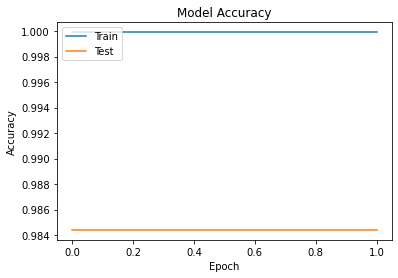

In [11]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')